In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Preprocesamiento y balanceo

In [3]:
data.shape

(10841, 13)

In [4]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Observamos que en este conjunto de datos la calificación máxima de una aplicación es 19, pero la calificación máxima de una aplicación en la tienda de Google Play es 5.

In [7]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)

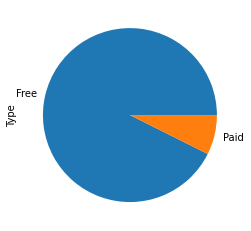

In [9]:
data.Type.value_counts().plot.pie()
plt.show()

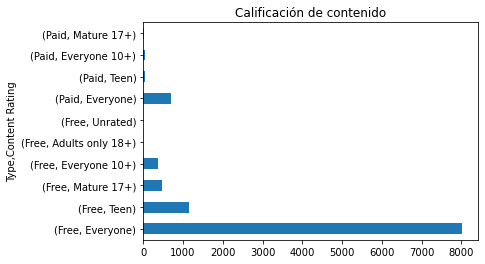

In [10]:
contenido = data.groupby("Type")["Content Rating"]
contenido.value_counts().plot.barh()
plt.title("Calificación de contenido")
plt.show()

Lo más importante acerca de las aplicaciones son las calificaciones, antes de descargar la aplicación vemos la calificación, y si esta es más de 4 es cuando la descargamos, en segundo lugar vemos otros atributos de las aplicaciones como las reseñas de la gente que ya la probó y etc.

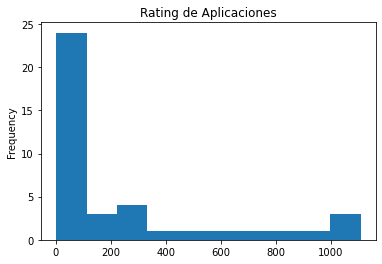

In [11]:
data.Rating.value_counts().plot.hist()
plt.title("Rating de Aplicaciones")
plt.show()

In [12]:
total = data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
App,0,0.000000
Category,1,0.000092
Rating,1474,0.135965
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,1,0.000092


In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(9360, 13)

In [15]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
category = pd.get_dummies(data['Category'], prefix = 'Category',drop_first=True)
type = pd.get_dummies(data['Type'], prefix = 'Type', drop_first=True)
content_rating = pd.get_dummies(data['Content Rating'], prefix = 'Cont_rating',drop_first=True)
frames = [data, category, type, content_rating]
data = pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'], axis = 1, inplace = True)

In [17]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis = 1, inplace = True)

In [18]:
data.head()

,Rating,Reviews,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Cont_rating_Everyone,Cont_rating_Everyone 10+,Cont_rating_Mature 17+,Cont_rating_Teen,Cont_rating_Unrated
0,4.1,159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Selección y aplicación del clasificador

In [19]:
dt_features = data.drop('Rating',axis=1)
dt_target = data['Rating'].values
dt_target = dt_target.astype('int')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size = 0.2, random_state=0)

In [21]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Regresión logística

In [22]:
logreg = LogisticRegression(max_iter = 1000,random_state=0)
logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print('LogisticRegression_accuracy:', accuracy)

LogisticRegression_accuracy: 0.7654914529914529


In [31]:
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[   0,    0,    0,   16,    0],
       [   0,    0,    0,   50,    0],
       [   0,    0,    2,  318,    0],
       [   0,    0,    0, 1431,    0],
       [   0,    0,    0,   55,    0]], dtype=int64)

Text(0.5, 257.44, 'Prediccion')

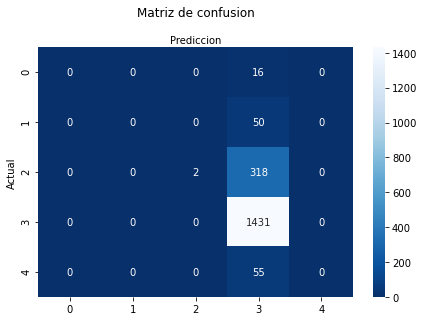

In [32]:
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion')

### RandomForest

In [33]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
accuracy2 = accuracy_score(y_pred, y_test)
print('RandomForest_accuracy:', accuracy2)

RandomForest_accuracy: 0.4155982905982906


In [34]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[  0,   0,   1,   2,  13],
       [  1,   0,   1,   7,  41],
       [  7,   0,  41,  62, 210],
       [ 30,   1, 127, 687, 586],
       [  1,   0,   1,   3,  50]], dtype=int64)

Text(0.5, 15.0, 'Prediccion')

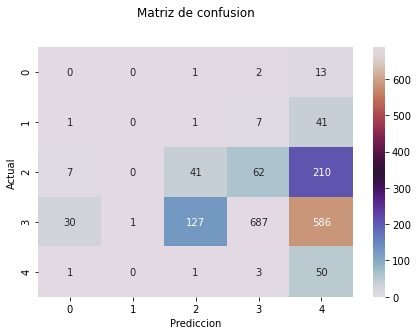

In [35]:
class_names2 = [0, 1]
fig2, ax2 = plt.subplots()
tick_marks2 = np.arange(len(class_names))
plt.xticks(tick_marks2, class_names2)
plt.yticks(tick_marks2, class_names2)

sns.heatmap(pd.DataFrame(cnf_matrix2), annot = True, cmap = 'twilight', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion')

###  Comparación de modelos

Text(0.5, 1.0, 'Model Accuracy')

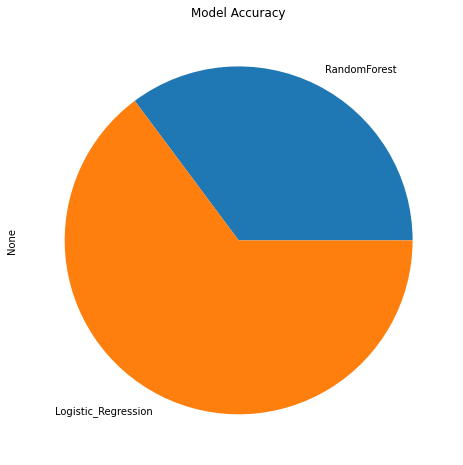

In [36]:
model_accuracy = pd.Series(data=[accuracy, accuracy2], 
        index=['Logistic_Regression', 'RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.pie()
plt.title('Model Accuracy')